## Decision Tree using ID3 algorithm 


In [14]:
import numpy as np
import pandas as pd
import math
from collections import deque

class Node:
# Contains the information of the node and another nodes of the Decision Tree.
        def __init__(self):
          self.value = None
          self.next = None
          self.childs = None


class DecisionTreeClassifier: # Decision Tree Classifier using ID3 algorithm.
       def __init__(self, X, feature_names, labels):
        self.X = X
        self.feature_names = feature_names
        self.labels = labels
        self.labelCategories = list(set(labels))
        self.labelCategoriesCount = [list(labels).count(x) for x in self.labelCategories]
        self.node = None
        self.entropy = self._get_entropy([x for x in range(len(self.labels))])
      
       def _get_entropy(self, x_ids): 
        labels = [self.labels[i] for i in x_ids]  # sorted labels by instance id
        label_count = [labels.count(x) for x in self.labelCategories]   # count number of instances of each category
        # calculate the entropy for each category and sum them
        entropy = sum([-count / len(x_ids) * math.log(count / len(x_ids), 2) if count else 0 for count in label_count])
        return entropy

       def _get_information_gain(self, x_ids, feature_id):
        #Calculates the information gain for a given feature based on its entropy and the total entropy of the system.
        info_gain = self._get_entropy(x_ids)  # calculate total entropy
        x_features = [self.X[x][feature_id] for x in x_ids] # store in a list all the values of the chosen feature
        feature_vals = list(set(x_features)) # get unique values
        feature_vals_count = [x_features.count(x) for x in feature_vals] # get frequency of each value
        # get the feature values ids
        feature_vals_id = [
            [x_ids[i]
            for i, x in enumerate(x_features)
            if x == y]
            for y in feature_vals
        ]

        # compute the information gain with the chosen feature
        info_gain = info_gain - sum([val_counts / len(x_ids) * self._get_entropy(val_ids)
                                     for val_counts, val_ids in zip(feature_vals_count, feature_vals_id)])

        return info_gain

       def _get_feature_max_information_gain(self, x_ids, feature_ids):
    #Finds the attribute/feature that maximizes the information gain.
        
        # get the entropy for each feature
        features_entropy = [self._get_information_gain(x_ids, feature_id) for feature_id in feature_ids]
        # find the feature that maximises the information gain
        max_id = feature_ids[features_entropy.index(max(features_entropy))]

        return self.feature_names[max_id], max_id

       def id3(self):
    #Initializes ID3 algorithm to build a Decision Tree Classifier.
        x_ids = [x for x in range(len(self.X))]
        feature_ids = [x for x in range(len(self.feature_names))]
        self.node = self._id3_recv(x_ids, feature_ids, self.node)
        print('') 

       def _id3_recv(self, x_ids, feature_ids, node):
    #ID3 algorithm. It is called recursively until some criteria is met.
        if not node:
            node = Node()  # initialize nodes
        # sorted labels by instance id
        labels_in_features = [self.labels[x] for x in x_ids]
        # if all the example have the same class (pure node), return node
        if len(set(labels_in_features)) == 1:
            node.value = self.labels[x_ids[0]]
            node.childs = None
            return node
        # if there are not more feature to compute, return node with the most probable class
        if len(feature_ids) == 0:
            node.value = max(set(labels_in_features), key=labels_in_features.count)  # compute mode
            node.childs = None
            return node
        # else...
        # choose the feature that maximizes the information gain
        best_feature_name, best_feature_id = self._get_feature_max_information_gain(x_ids, feature_ids)
        node.value = best_feature_name
        node.childs = []
        # value of the chosen feature for each instance
        feature_values = list(set([self.X[x][best_feature_id] for x in x_ids]))
        # loop through all the values
        for value in feature_values:
            child = Node()
            child.value = value  # add a branch from the node to each feature value in our feature
            node.childs.append(child)  # append new child node to current node
            child_x_ids = [x for x in x_ids if self.X[x][best_feature_id] == value]
            if not child_x_ids:
                child.next = max(set(labels_in_features), key=labels_in_features.count)
                print('')
            else:
                if feature_ids and best_feature_id in feature_ids:
                    to_remove = feature_ids.index(best_feature_id)
                    feature_ids.pop(to_remove)
                # recursively call the algorithm
                child.next = self._id3_recv(child_x_ids, feature_ids, child.next)
        return node

In [15]:
df = pd.read_csv(r"C:\Users\rithy\OneDrive\Desktop\2025-fairness-recruitment-dataset.csv")
df.head(10)

,mainid(hidden),mod15(hidden),div15(hidden),"Age(feature, sensitive))",Speed(hidden),"Gender(feature,sensitive)",Strength(hidden),Speedtest(hidden),Lifttest(hidden),testresult(feature),...,Suitability(target),Value-when-hired(hidden),Candidate-loss-when-nothired(hidden),Should-hire(target),Shouldnothire,hired-by-expert,A1(testresult),"A2(testresult,30under)","A3(Age,Gender, test)",A4(postive-dicr)
0,225000,0,0,22,2,male,6,1.0,1.0,2.0,...,4,"10,000",5000,1,0,1,1,1,1,1
1,225001,1,0,26,2,male,6,0.5,1.0,1.5,...,4,"10,000",5000,1,0,1,1,1,1,0
2,225002,2,0,28,1,male,6,1.0,1.0,2.0,...,3,"5,000",5000,1,0,1,1,1,1,1
3,225003,3,0,28,1,male,6,0.5,1.0,1.5,...,3,"5,000",5000,1,0,1,1,1,1,0
4,225004,4,0,32,2,male,6,1.0,1.0,2.0,...,4,"10,000",5000,1,0,1,1,1,1,1
5,225005,5,0,39,1,male,6,1.0,1.0,2.0,...,3,"5,000",5000,1,0,0,1,1,1,1
6,225006,6,0,31,1,male,6,0.5,1.0,1.5,...,3,"5,000",5000,1,0,1,1,1,1,0
7,225007,7,0,36,0,male,6,0.5,1.0,1.5,...,1,"-10,000",10,0,1,0,1,1,1,0
8,225008,8,0,38,0,male,6,0.0,1.0,1.0,...,1,"-10,000",10,0,1,0,0,0,0,0
9,225009,9,0,46,1,male,6,0.5,1.0,1.5,...,3,"5,000",5000,1,0,1,1,0,0,1


In [48]:
# Feature selection
features_to_use = [
    'Age(feature, sensitive))', 
    'Gender(feature,sensitive)',   
    'testresult(feature)' 
    ]
target = 'Should-hire(target)'

X = df[features_to_use]
y = df[target]

# ID3 needs categories, so we bin the continuous Age values
X['Age(feature, sensitive))'] = pd.cut(
    X['Age(feature, sensitive))'], 
    bins=[0, 25, 35, 100], 
    labels=['<25', '25-35', '>35']
)

# Convert to lists for the ID3 function
X_list = X.values.tolist()
y_list = y.values.tolist()
feature_names = list(X.columns)

# Instantiate
tree_clf = DecisionTreeClassifier(X_list, feature_names, y_list)
tree_clf.id3()

# Predictions
def custom_predict(node, sample, feature_names):
    # Base case: we reached a leaf
    if node.childs is None:
        return node.value
    
    # Logic: find which feature this node checks
    f_name = node.value
    f_idx = feature_names.index(f_name)
    sample_val = sample[f_idx]
    
    # Logic: follow the branch that matches the sample's value
    for child in node.childs:
        if child.value == sample_val:
            # If next is a Node, recurse. If it's a final value, return it.
            if isinstance(child.next, Node):
                return custom_predict(child.next, sample, feature_names)
            return child.next
    
    # Fallback if value not seen in training
    return False 

# Use a list comprehension to get all predictions
y_pred = [custom_predict(tree_clf.node, sample, feature_names) for sample in X_list]

C:\Users\rithy\AppData\Local\Temp\ipykernel_21664\2483974033.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age(feature, sensitive))'] = pd.cut(


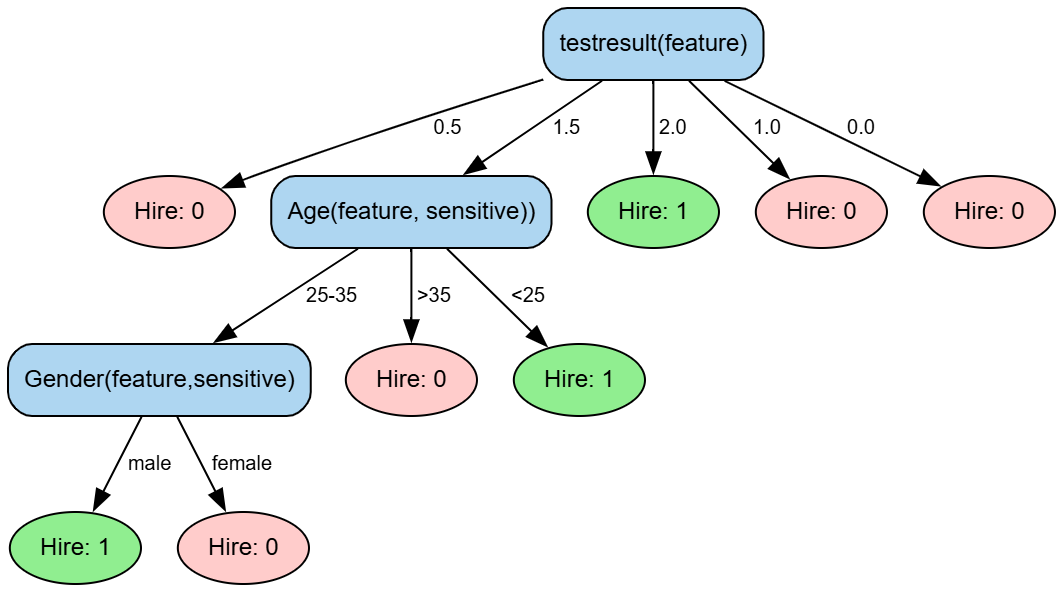

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

# 1. Overall Performance
print("Overall Performance:")
print(classification_report(y_list, y_pred))

# 2. Fairness Analysis (The "Slice")
# This is the most important part of your assignment
results = pd.DataFrame({'Actual': y_list, 'Pred': y_pred, 'Gender': X['Gender(feature,sensitive)']})

for group in results['Gender'].unique():
    subset = results[results['Gender'] == group]
    print(f"\n--- Metrics for {group} ---")
    print(classification_report(subset['Actual'], subset['Pred']))
    

Overall Performance:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       150
           1       0.80      0.52      0.63        75

    accuracy                           0.80       225
   macro avg       0.80      0.73      0.74       225
weighted avg       0.80      0.80      0.78       225


--- Metrics for male ---
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        90
           1       0.79      0.57      0.66        60

    accuracy                           0.77       150
   macro avg       0.77      0.73      0.74       150
weighted avg       0.77      0.77      0.76       150


--- Metrics for female ---
              precision    recall  f1-score   support

           0       0.86      0.98      0.91        60
           1       0.83      0.33      0.48        15

    accuracy                           0.85        75
   macro avg       0.84      0.66      0.70        75

In [51]:
audit_df = pd.DataFrame({
    'Actual': y_list,
    'Predicted': y_pred,
    'AgeGroup': X['Age(feature, sensitive))']  # Using your exact column name
})

# 2. Loop through each age group to print individual reports
age_groups = audit_df['AgeGroup'].unique()

for group in age_groups:
    subset = audit_df[audit_df['AgeGroup'] == group]
    print(f"\n" + "="*40)
    print(f" PERFORMANCE FOR AGE: {group} ")
    print("="*40)
    
    # We use zero_division=0 to handle cases where the model might never predict 'True'
    print(classification_report(subset['Actual'], subset['Predicted'], zero_division=0))


 PERFORMANCE FOR AGE: <25 
              precision    recall  f1-score   support

           0       0.61      0.79      0.69        14
           1       0.84      0.70      0.76        23

    accuracy                           0.73        37
   macro avg       0.73      0.74      0.72        37
weighted avg       0.75      0.73      0.73        37


 PERFORMANCE FOR AGE: 25-35 
              precision    recall  f1-score   support

           0       0.76      0.84      0.79        37
           1       0.76      0.66      0.70        29

    accuracy                           0.76        66
   macro avg       0.76      0.75      0.75        66
weighted avg       0.76      0.76      0.75        66


 PERFORMANCE FOR AGE: >35 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91        99
           1       0.80      0.17      0.29        23

    accuracy                           0.84       122
   macro avg       0.82      0.58      0.6